<a href="https://colab.research.google.com/github/patiladesh523/Adesh-Projects/blob/main/Supermarket_Sales_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supermarket Sales Data Analysis

1. Load And Explore the Data

In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Colab Dataset/SuperMarket Analysis.csv")
print(df.head(5))

    Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428   Alex     Yangon        Member  Female   
1  226-31-3081   Giza  Naypyitaw        Normal  Female   
2  631-41-3108   Alex     Yangon        Normal  Female   
3  123-19-1176   Alex     Yangon        Member  Female   
4  373-73-7910   Alex     Yangon        Member  Female   

             Product line  Unit price  Quantity   Tax 5%     Sales       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715   1/5/2019   
1  Electronic accessories       15.28         5   3.8200   80.2200   3/8/2019   
2      Home and lifestyle       46.33         7  16.2155  340.5255   3/3/2019   
3       Health and beauty       58.22         8  23.2880  489.0480  1/27/2019   
4       Sports and travel       86.31         7  30.2085  634.3785   2/8/2019   

          Time      Payment    cogs  gross margin percentage  gross income  \
0   1:08:00 PM      Ewallet  522.83                 4.761905       26.1415   
1  10:29

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Sales                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [ ]:
print(df.describe())

        Unit price     Quantity       Tax 5%        Sales        cogs  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.00000   
mean     55.672130     5.510000    15.379369   322.966749   307.58738   
std      26.494628     2.923431    11.708825   245.885335   234.17651   
min      10.080000     1.000000     0.508500    10.678500    10.17000   
25%      32.875000     3.000000     5.924875   124.422375   118.49750   
50%      55.230000     5.000000    12.088000   253.848000   241.76000   
75%      77.935000     8.000000    22.445250   471.350250   448.90500   
max      99.960000    10.000000    49.650000  1042.650000   993.00000   

       gross margin percentage  gross income      Rating  
count             1.000000e+03   1000.000000  1000.00000  
mean              4.761905e+00     15.379369     6.97270  
std               6.131498e-14     11.708825     1.71858  
min               4.761905e+00      0.508500     4.00000  
25%               4.761905e+00      5.924875   

2. Data Cleaning
   * Convert Data and Time to datetime format .
   * Check for missing values .

In [ ]:
# Convert Date column
df["Date"] = pd.to_datetime(df["Date"])

In [ ]:
# Extract day
df["Day"] = df["Date"].dt.day

In [ ]:
df["Day"]

,Day
0,5
1,8
2,3
3,27
4,8
...,...
995,29
996,2
997,9
998,22


In [ ]:
# Extract month
df['Month'] = df["Date"].dt.month

In [ ]:
df['Month']

,Month
0,1
1,3
2,3
3,1
4,2
...,...
995,1
996,3
997,2
998,2


In [ ]:
# Convert Time to hour
df["Hour"] = pd.to_datetime(df['Time']).dt.hour

/tmp/ipython-input-33-1742724894.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Hour"] = pd.to_datetime(df['Time']).dt.hour


In [ ]:
df['Hour']

,Hour
0,13
1,10
2,13
3,20
4,10
...,...
995,13
996,17
997,13
998,15


3. Sales Overview
   * Total Revenue
   * Average Sale per Transaction
   * Total Quantity Sold

In [ ]:
# Total Revenue
total_revenue = df['Sales'].sum()

In [ ]:
total_revenue

np.float64(322966.749)

In [ ]:
# Average Sale per Transaction
avg_sale = df["Sales"].mean()

In [ ]:
avg_sale

np.float64(322.966749)

In [ ]:
# Total Quantity Sold
total_quantity = df["Quantity"].sum()

In [ ]:
total_quantity

np.int64(5510)

4. Sales by Category

In [ ]:
#1. Sales by Product Line
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Total sales by product line
sales_by_product = df.groupby('Product line')['Sales'].sum().sort_values()

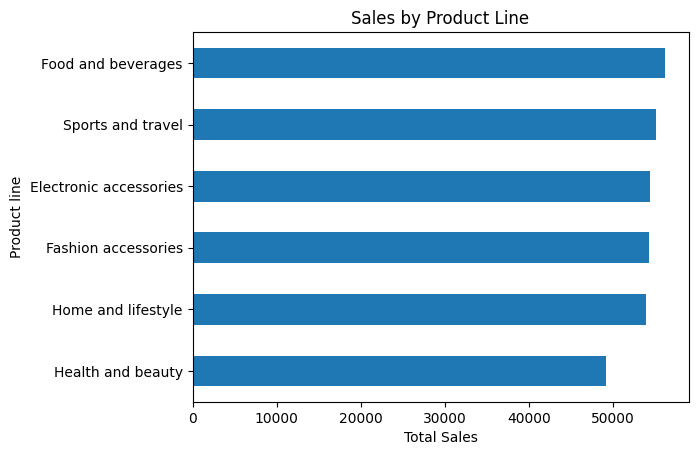

In [ ]:
# Plot
sales_by_product.plot(kind="barh",title="Sales by Product Line")
plt.xlabel("Total Sales")
plt.show()

In [ ]:
# 2. Sales by City
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Total sales by City
sales_by_city = df.groupby('City')['Sales'].sum()

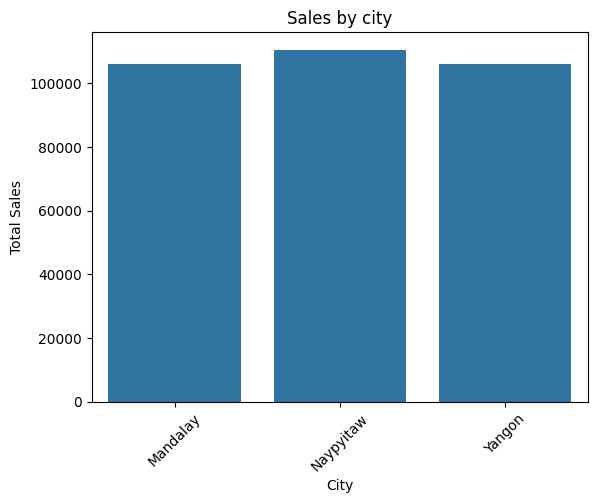

In [ ]:
# Plot
sns.barplot(x = sales_by_city.index, y = sales_by_city.values)
plt.title('Sales by city')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

5. Customer Insights

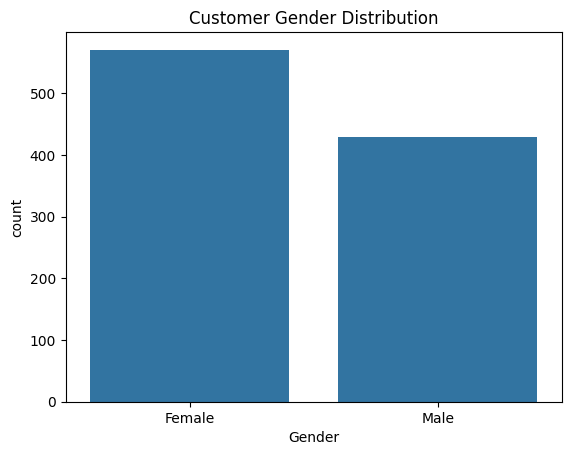

In [ ]:
# Gender Distribution
sns.countplot(data=df,x ="Gender")
plt.title("Customer Gender Distribution")
plt.show()

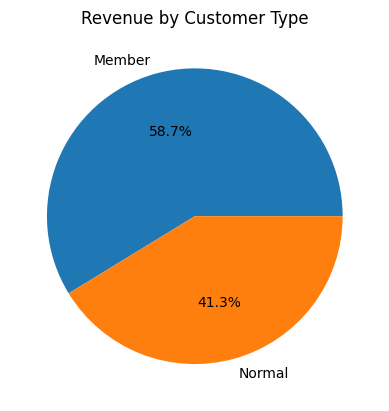

In [ ]:
# Member vs Normal Sales
df.groupby('Customer type')['Sales'].sum().plot(kind='pie',autopct='%1.1f%%')
plt.title('Revenue by Customer Type')
plt.ylabel('')
plt.show()

6. Payment Methods Analysis

/tmp/ipython-input-49-3568176172.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = payment_counts.index,y = payment_counts.values,palette = "Set1")


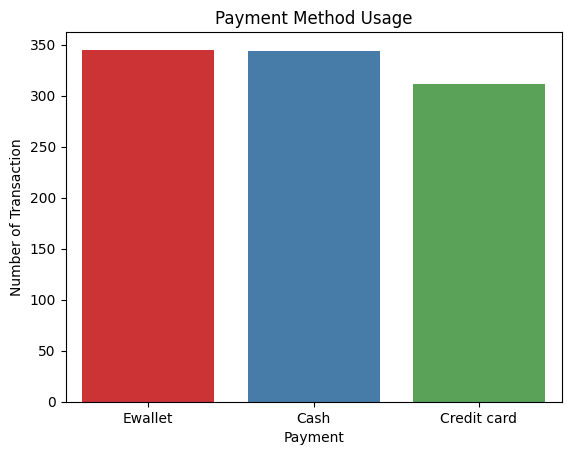

In [ ]:
payment_counts = df['Payment'].value_counts()
sns.barplot(x = payment_counts.index,y = payment_counts.values,palette = "Set1")
plt.title("Payment Method Usage")
plt.ylabel("Number of Transaction")
plt.show()

7. Time-Based Analysis

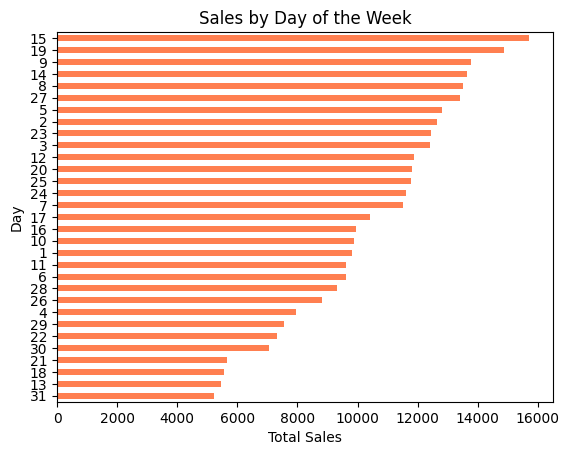

In [ ]:
# Sales by Day
day_sales = df.groupby('Day')['Sales'].sum().sort_values()
day_sales.plot(kind='barh',color='coral')
plt.title("Sales by Day of the Week")
plt.xlabel('Total Sales')
plt.show()

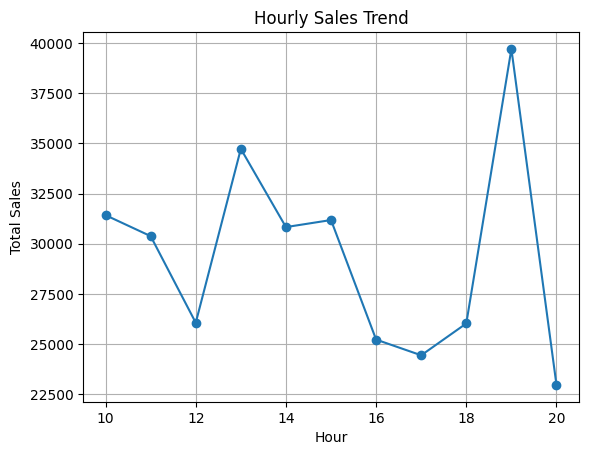

In [ ]:
# Sales by Hour
hour_sales = df.groupby('Hour')['Sales'].sum()
hour_sales.plot(marker='o')
plt.title('Hourly Sales Trend')
plt.xlabel("Hour")
plt.ylabel("Total Sales")
plt.grid(True)
plt.show()

8) Ratings Analysis

/tmp/ipython-input-54-3215768607.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rating_by_product.values,y=rating_by_product.index,palette="coolwarm")


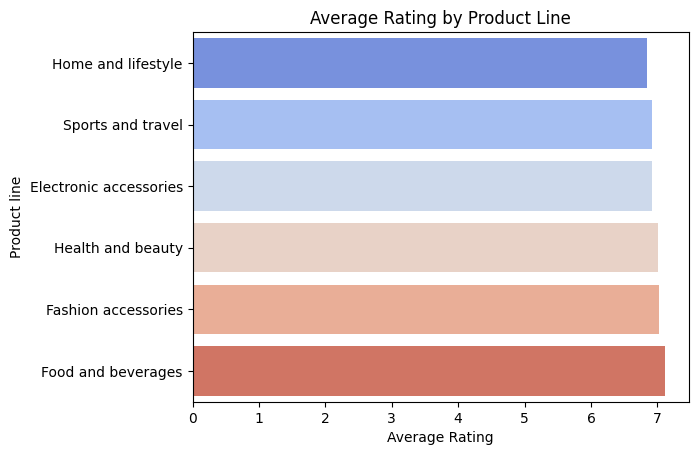

In [ ]:
# Average ratings per product line
rating_by_product = df.groupby("Product line")['Rating'].mean().sort_values()
sns.barplot(x=rating_by_product.values,y=rating_by_product.index,palette="coolwarm")
plt.title("Average Rating by Product Line")
plt.xlabel('Average Rating')
plt.show()

9) Gross Income Analysis

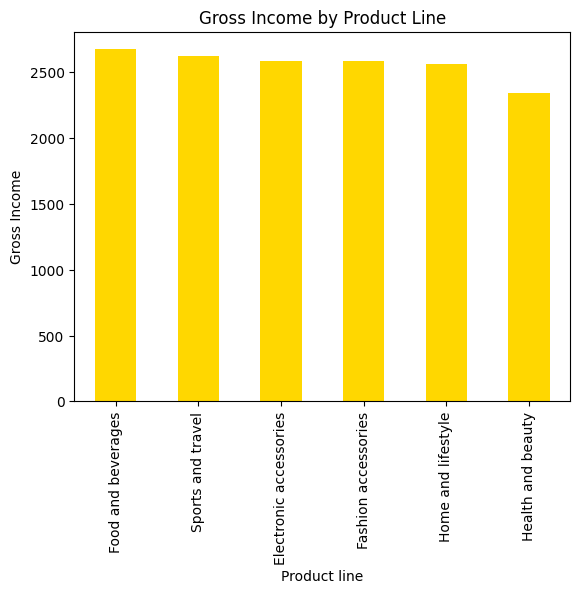

In [ ]:
# Top 5 gross income sources
top_gross = df.groupby("Product line")['gross income'].sum().sort_values(ascending=False)
top_gross.plot(kind='bar',color='gold')
plt.title('Gross Income by Product Line')
plt.ylabel("Gross Income")
plt.show()

10) Top 10 Invoices

In [ ]:
top_invoices = df.sort_values(by='Sales',ascending = False).head(10)
print(top_invoices[['Invoice ID','Branch','Sales','Product line']])

      Invoice ID Branch     Sales         Product line
350  860-79-0874   Giza  1042.650  Fashion accessories
167  687-47-8271   Alex  1039.290  Fashion accessories
557  283-26-5248   Giza  1034.460   Food and beverages
699  751-41-9720   Giza  1023.750   Home and lifestyle
996  303-96-2227  Cairo  1022.490   Home and lifestyle
792  744-16-7898  Cairo  1022.385   Home and lifestyle
422  271-88-8734   Giza  1020.705  Fashion accessories
166  234-65-2137   Giza  1003.590   Home and lifestyle
357  554-42-2417   Giza  1002.120    Sports and travel
429  325-77-6186   Alex   951.825   Home and lifestyle


11) Correlation Heatmap

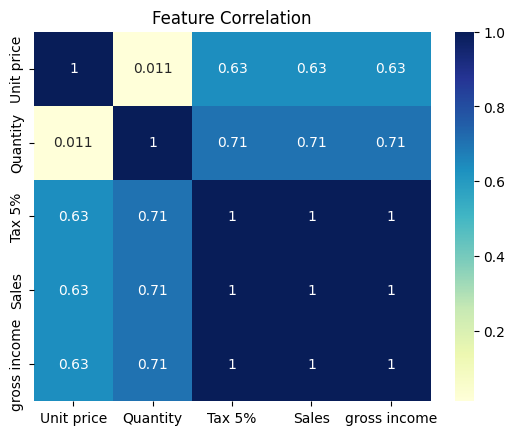

In [ ]:
corr = df[['Unit price','Quantity','Tax 5%','Sales','gross income']].corr()
sns.heatmap(corr,annot=True,cmap='YlGnBu')
plt.title('Feature Correlation')
plt.show()


12) Export Cleaned Data

In [ ]:
df.to_csv("cleaned_supermarket_sales.csv",index=False)